# **Anggota Tim ZeroOne.Learning**


1.   Zulfikar Setyo Priyambudi ~ Universitas Muhammadiyah Surakarta
2.   Happyta Nilam Sari ~ Universitas Muhammadiyah Semarang
3.   Ade Irvan Kurniawan ~ Universitas Diponegoro



# **Problem Statement**

Di Indonesia, pandemi COVID-19 terdeteksi pada awal Maret, tepatnya pada 2 Maret 2020, 2 orang  dinyatakan positif COVID-19 sehingga disebut Kasus 1 dan Kasus 2. Dari dua kasus tersebut terdapat penambahan kasus positif COVID-19 setiap harinya. Berdasarkan data yang ada, kasus positif COVID-19 semakin bertambah dan kesembuhan pasien COVID-19 juga bertambah setiap harinya. Dari kasus tersebut, maka kami melakukan penelitian di Ibu Kota Indonesia yaitu Jakarta dengan mengangkat judul tentang “Prediksi Kesembuhan Pasien Covid-19 di Jakarta menggunakan Polynomial Regression'. Penelitian dilakukan dengan tujuan untuk memperoleh model dalam memprediksi Kesembuhan Pasien COVID-19 di Jakarta.

<br>Dari penambahan kasus positif COVID-19 setiap harinya, sangatlah dibutuhkan pengambilan keputusan (strategis & operasional) berbasis data, sehingga kebijakan dan keputusan yang dipilih adalah yang paling baik dan relevan, baik itu oleh pemerintah, industri, dan masyarakat.<br>

<br>Untuk mengurangi bertambahnya kasus COVID-19 setiap harinya maka dilakukan pencegahan seperti mematuhi protokol kesehatan dan vaksinasi. Hal tersebut merupakan upaya "COVID-19 Recovery" . Pada penelitian ini, kami juga menganalisis relevansi antara tingkat kesembuhan pasien COVID-19 dengan Vaksinasi.<br>

# **Data Cleansing and Preprocessing**

## Import Library

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import scipy as sp
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

## Import Dataset Covid-19 Jakarta

In [ ]:
data = pd.read_excel("Daily Update Data Agregat Covid-19 Jakarta.xlsx", sheet_name ="Data Indonesia dan Jakarta")
data2 = pd.read_excel("Daily Update Data Agregat Covid-19 Jakarta.xlsx", sheet_name ="Vaksinasi Wilayah")
data3 = pd.read_excel("Daily Update Data Agregat Covid-19 Jakarta.xlsx", sheet_name ="Pemakaman")

In [ ]:
data.columns

Index(['Tanggal', 'Positif (Indonesia)', 'Dirawat (Indonesia)',
       'Sembuh (Indonesia)', 'Meninggal (Indonesia)', 'Meninggal (Jakarta)',
       'Sembuh (Jakarta)', 'Self-Isolation (Jakarta)', 'Dirawat (Jakarta)',
       'Positif (Jakarta)', 'Positif Aktif (Jakarta)',
       'Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)',
       'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)',
       'Meninggal Harian (Jakarta)', 'Sembuh Harian (Jakarta)',
       'Self-Isolation Harian (Jakarta)', 'Dirawat Harian (Jakarta)',
       'Positif Harian (Jakarta)', 'Positif Aktif Harian (Jakarta)'],
      dtype='object')

In [ ]:
data2.columns

Index(['No.', 'Kecamatan', 'Kota / Kabupaten', 'Target Total per Kecamatan',
       'Target Harian per Kecamatan', 'Cakupan 13 Jan - 11 Juni', 'Unnamed: 6',
       'Unnamed: 7', 'Cakupan 12 Juni', 'Unnamed: 9',
       ...
       'Unnamed: 1156', 'Cakupan 30 Juni.1', 'Unnamed: 1158', 'Unnamed: 1159',
       'Cakupan 01 Juli', 'Unnamed: 1161', 'Unnamed: 1162', 'Cakupan 02 Juli',
       'Unnamed: 1164', 'Unnamed: 1165'],
      dtype='object', length=1166)

In [ ]:
data3.columns

Index(['Tanggal', 'Jumlah Laporan', 'Akumulasi', 'Harian Pemakaman Umum',
       'Total Pemakaman Umum'],
      dtype='object')

## Pengolahan Data Vaksin Wilayah Jakarta

In [ ]:
df = pd.DataFrame(data2, columns= ['Kecamatan','Kota / Kabupaten'])
df['Target Total Vaksin Per Kecamatan'] = data2['Target Total per Kecamatan']

In [ ]:
df.drop(df.index[0:1], inplace=True)
df.reset_index(inplace=True)
df.drop(axis=1, columns="index", inplace=True)

In [ ]:
df.head(6)

,Kecamatan,Kota / Kabupaten,Target Total Vaksin Per Kecamatan
0,Cakung,Jakarta Timur,515628.0
1,Cengkareng,Jakarta Barat,519118.0
2,Kali Deres,Jakarta Barat,406018.0
3,Cilincing,Jakarta Utara,392136.0
4,Duren Sawit,Jakarta Timur,404329.0
5,Tanjung Priok,Jakarta Utara,377764.0


### Simpan Dataset Vaksin Wilayah Baru (CSV)

In [ ]:
df.to_csv("dataset_vaksin-wilayah_covid-19_Jakarta.csv", index=False)

In [ ]:
df_vaksin = pd.read_csv("https://raw.githubusercontent.com/adeirvan123/Tugas-Soal-1/main/dataset_vaksin-wilayah_covid-19_Jakarta.csv")
df_vaksin.head(6)

,Kecamatan,Kota / Kabupaten,Target Total Vaksin Per Kecamatan
0,Cakung,Jakarta Timur,515628.0
1,Cengkareng,Jakarta Barat,519118.0
2,Kali Deres,Jakarta Barat,406018.0
3,Cilincing,Jakarta Utara,392136.0
4,Duren Sawit,Jakarta Timur,404329.0
5,Tanjung Priok,Jakarta Utara,377764.0


## Pengolahan Data Covid-19 Jakarta

In [ ]:
ds = pd.DataFrame(data, columns= ['Tanggal','Positif (Jakarta)','Sembuh (Jakarta)','Meninggal (Jakarta)','Positif Aktif (Jakarta)'])
ds.head()

,Tanggal,Positif (Jakarta),Sembuh (Jakarta),Meninggal (Jakarta),Positif Aktif (Jakarta)
0,2020-01-29,0,0,0,0
1,2020-03-01,0,0,0,0
2,2020-03-02,0,0,0,0
3,2020-03-03,3,0,1,2
4,2020-03-04,3,0,1,2


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Tanggal                  854 non-null    datetime64[ns]
 1   Positif (Jakarta)        854 non-null    int64         
 2   Sembuh (Jakarta)         854 non-null    int64         
 3   Meninggal (Jakarta)      854 non-null    int64         
 4   Positif Aktif (Jakarta)  854 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 33.5 KB


### Menghitung Mortality Rate & Recovery Rate

Selanjutnya kita akan melihat tingkat kematian (Mortality rate) dan tingkat kesembuhan (Recovery rate) setiap harinya dengan persamaan sebagai berikut.

<br>Mortality rate adalah rasio dari jumlah kematian dibagi jumlah kasus positif tiap harinya yang dihitung dengan formula sebagai berikut :<br>

$$mortality\;rate = \frac{jumlah\:kematian}{jumlah\:kasus\:positif}$$

<br>Recovery rate adalah rasio dari jumlah sembuh dibagi jumlah kasus positif tiap harinya yang dihitung dengan formula sebagai berikut :<br>

$$recovery\:rate = \frac{jumlah\:sembuh}{jumlah\:kasus\:positif}$$

In [ ]:
mortality_rate = []
recovery_rate = []

for i in range(len(ds.Tanggal)):
  mortality_rate.append(ds['Meninggal (Jakarta)'][i]/ds['Positif (Jakarta)'][i]) 
  recovery_rate.append(ds['Sembuh (Jakarta)'][i]/ds['Positif (Jakarta)'][i]) 

In [ ]:
ds["mortality_rate"] = mortality_rate
ds["recovery_rate"] = recovery_rate

In [ ]:
ds.head(6)

,Tanggal,Positif (Jakarta),Sembuh (Jakarta),Meninggal (Jakarta),Positif Aktif (Jakarta),mortality_rate,recovery_rate
0,2020-01-29,0,0,0,0,NaN,NaN
1,2020-03-01,0,0,0,0,NaN,NaN
2,2020-03-02,0,0,0,0,NaN,NaN
3,2020-03-03,3,0,1,2,0.333333,0.0
4,2020-03-04,3,0,1,2,0.333333,0.0
5,2020-03-05,7,0,3,4,0.428571,0.0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Tanggal                  854 non-null    datetime64[ns]
 1   Positif (Jakarta)        854 non-null    int64         
 2   Sembuh (Jakarta)         854 non-null    int64         
 3   Meninggal (Jakarta)      854 non-null    int64         
 4   Positif Aktif (Jakarta)  854 non-null    int64         
 5   mortality_rate           851 non-null    float64       
 6   recovery_rate            851 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 46.8 KB


### Membuang Nilai NaN Dataset Baru

Tedapat nilai NAN pada dataset yang mana merupakan hari sebelum kasus positif dicatat, maka dari itu baris dengan nilai NAN bisa dibuang, untuk menhindari bias dalam pemodelan.

In [ ]:
ds.dropna(inplace=True)
ds.reset_index(inplace=True)
ds.drop(axis=1, columns="index", inplace=True)

In [ ]:
ds.head()

,Tanggal,Positif (Jakarta),Sembuh (Jakarta),Meninggal (Jakarta),Positif Aktif (Jakarta),mortality_rate,recovery_rate
0,2020-03-03,3,0,1,2,0.333333,0.0
1,2020-03-04,3,0,1,2,0.333333,0.0
2,2020-03-05,7,0,3,4,0.428571,0.0
3,2020-03-06,7,0,3,4,0.428571,0.0
4,2020-03-07,7,0,3,4,0.428571,0.0


### Simpan Dataset Covid-19 Baru (CSV)

In [ ]:
ds.to_csv("dataset_covid-19_DKI_Jakarta.csv", index=False)

In [ ]:
df_covid = pd.read_csv("https://raw.githubusercontent.com/adeirvan123/Tugas-Soal-1/main/dataset_covid-19_DKI_Jakarta.csv")
df_covid.head()

,Tanggal,Positif (Jakarta),Sembuh (Jakarta),Meninggal (Jakarta),Positif Aktif (Jakarta),mortality_rate,recovery_rate
0,2020-03-03,3,0,1,2,0.333333,0.0
1,2020-03-04,3,0,1,2,0.333333,0.0
2,2020-03-05,7,0,3,4,0.428571,0.0
3,2020-03-06,7,0,3,4,0.428571,0.0
4,2020-03-07,7,0,3,4,0.428571,0.0


## Pengolahan Data Pemakaman Pasien Covid-19 Jakarta

In [ ]:
da = pd.DataFrame(data3, columns= ['Tanggal','Harian Pemakaman Umum','Total Pemakaman Umum'])
da.head()

,Tanggal,Harian Pemakaman Umum,Total Pemakaman Umum
0,2020-03-01,150,150
1,2020-03-02,136,286
2,2020-03-03,135,421
3,2020-03-04,116,537
4,2020-03-05,124,661


### Simpan Dataset Pemakaman Pasien Covid-19 Baru (CSV)

In [ ]:
da.to_csv("dataset_pemakaman_covid-19_DKI_Jakarta.csv", index=False)

In [ ]:
df_pemakaman = pd.read_csv("https://raw.githubusercontent.com/adeirvan123/Tugas-Soal-1/main/dataset_pemakaman_covid-19_DKI_Jakarta.csv")
df_pemakaman.head()

,Tanggal,Harian Pemakaman Umum,Total Pemakaman Umum
0,2020-03-01,150,150
1,2020-03-02,136,286
2,2020-03-03,135,421
3,2020-03-04,116,537
4,2020-03-05,124,661


# **Exploratory Data Analysis**

In [ ]:
def plot_stats(x_data, y_data, title, y_label):
    plt.plot(x_data, y_data)
    plt.title(title)
    plt.xlabel('Hari Sejak Maret 03, 2020')
    plt.ylabel(y_label)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

## Visualisasi Data Kasus Covid-19 Jakarta

In [ ]:
jumlah_hari_future = 15
prediksi_future = np.array([i for i in range(len(df_covid.Tanggal)+jumlah_hari_future)]).reshape(-1, 1)
adjust_dates = prediksi_future[:-15]

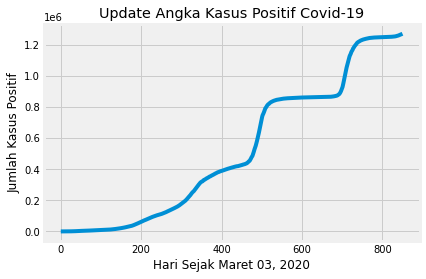

In [ ]:
plot_stats(adjust_dates, df_covid['Positif (Jakarta)'],'Update Angka Kasus Positif Covid-19','Jumlah Kasus Positif')

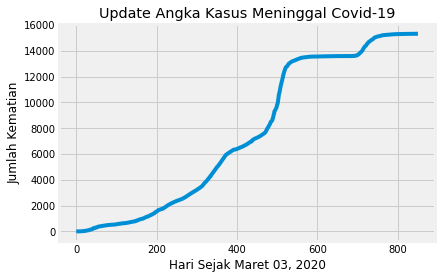

In [ ]:
plot_stats(adjust_dates, df_covid["Meninggal (Jakarta)"],'Update Angka Kasus Meninggal Covid-19','Jumlah Kematian')

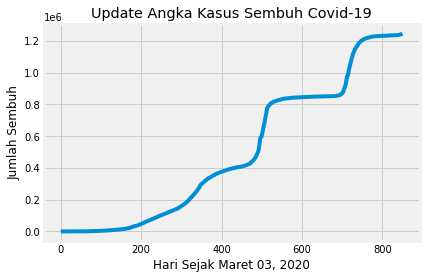

In [ ]:
plot_stats(adjust_dates, df_covid["Sembuh (Jakarta)"], 'Update Angka Kasus Sembuh Covid-19', 'Jumlah Sembuh')

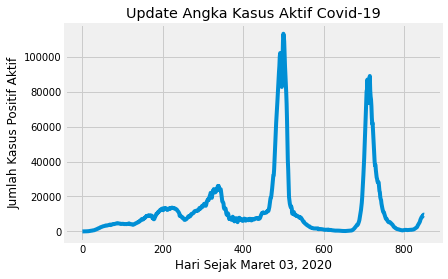

In [ ]:
plot_stats(adjust_dates, df_covid["Positif Aktif (Jakarta)"], 'Update Angka Kasus Aktif Covid-19','Jumlah Kasus Positif Aktif')

In [ ]:
df_covid[df_covid['Positif Aktif (Jakarta)']==df_covid["Positif Aktif (Jakarta)"].max()]

,Tanggal,Positif (Jakarta),Sembuh (Jakarta),Meninggal (Jakarta),Positif Aktif (Jakarta),mortality_rate,recovery_rate
500,2021-07-16,727016,604033,9845,113138,0.013542,0.830839


In [ ]:
temp = []
for i in range(600,800):
  temp.append(df_covid['Positif Aktif (Jakarta)'][i])
df_covid[df_covid['Positif Aktif (Jakarta)'] == np.array(temp).max()]

,Tanggal,Positif (Jakarta),Sembuh (Jakarta),Meninggal (Jakarta),Positif Aktif (Jakarta),mortality_rate,recovery_rate
715,2022-02-16,1095353,992213,14191,88949,0.012956,0.905839


Dari analisa diatas didapatkan hasil bahwa nilai kasus positif aktif harian tertinggi di Jakarta terjadi pada hari ke-500 dan 715.

<br>Pada hari ke-500, tepatnya pada tanggal **16 Juli 2021** terjadi lonjakan kasus tertinggi sebesar 113 ribu, yang terjadi karena beberapa faktor. Antara lain seperti :

1. Kejenuhan dengan disiplin protokol kesehatan
2. Peningkatan aktivitas sejak Ramadhan dan Hari Raya Idul Fitri 
3. Varian baru covid-19 yang muncul yaitu varian Alpha, Beta dan Delta,
4. kapasitas kesehatan atau health-system capacity yaitu testing dan tracing yang lemah.

[Sumber informasi = merdeka.com](https://www.merdeka.com/peristiwa/analisis-penyebab-lonjakan-dahsyat-covid-19-di-indonesia.html)
</br>

<br>Selanjutnya pada hari ke-715, pada tanggal **16 Februari 2022** juga terjadi lonjakan kasus positif di DKI Jakarta sebesar 88 ribu yang disebabkan oleh varian baru yaitu *Omnicron*. Lonjakan kasus tidak sebesar sebelumnya, dikarenakan pemerataan vaksin sudah dilakukan sejak 13 Januari 2021.

[Sumber informasi varian *Omnicron* = tirto.id](https://tirto.id/update-covid-omicron-dunia-16-februari-ada-715-juta-kasus-aktif-go1F)

[Sumber informasi hari pertama vaksin = kompas.com ](https://nasional.kompas.com/read/2021/01/14/06572221/dimulainya-vaksinasi-covid-19-di-indonesia)<br>

## Visualisasi Target Vaksin Kabupaten/Kota Jakarta

In [ ]:
def plot_bar_graphs(x_axis, y_axis, title):
    plt.figure()
    plt.barh(x_axis, y_axis)
    plt.title(title)
    plt.show()

In [ ]:
kota = np.array(df_vaksin['Kota / Kabupaten'].unique())
total_vaksin = []

for i in range(len(kota)):
  total_vaksin.append(df_vaksin[df_vaksin['Kota / Kabupaten'] == kota[i]]['Target Total Vaksin Per Kecamatan'].sum())

### DataFrame Distribusi Vaksin Jakarta

In [ ]:
data_vaksin = {"Kota":kota,
                              "Target_Vaksin_Per_Kota":total_vaksin}
distibusi_vaksin = pd.DataFrame(data_vaksin)
distibusi_vaksin_jakarta = distibusi_vaksin.sort_values(by=["Target_Vaksin_Per_Kota"],ascending=False)
distibusi_vaksin_jakarta

,Kota,Target_Vaksin_Per_Kota
0,Jakarta Timur,2917881.0
1,Jakarta Barat,2321771.0
3,Jakarta Selatan,2149465.0
2,Jakarta Utara,1658219.0
4,Jakarta Pusat,1010815.0
5,Kepulauan Seribu,25565.0


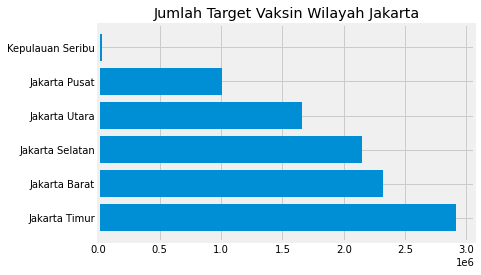

In [ ]:
plot_bar_graphs(distibusi_vaksin_jakarta.Kota, distibusi_vaksin_jakarta.Target_Vaksin_Per_Kota, 'Jumlah Target Vaksin Wilayah Jakarta')

Dari visualiasi target kebutuhan vaksin diatas disesuaikan dengan jumlah penduduk tiap Kabupaten/Kota dimana Kabupaten Jakarta Timur memiliki jumlah penduduk yang sangat banyak dibandingkan kabupaten yang lain.

Informasi jumlah penduduk dapat diakses melalui [Badan Pusat Statistika Provinsi DKI Jakarta](https://jakarta.bps.go.id/pressrelease/2021/01/22/541/jumlah-penduduk-hasil-sp2020-provinsi-dki-jakarta-sebesar-10-56-juta-jiwa.html)

### Informasi Kebutuhan Vaksin Tiap Kecamatan

In [ ]:
grouped = df_vaksin.groupby('Kota / Kabupaten')
for kota,informasi in grouped:
   print('\033[1m' + kota)
   print(informasi[["Kecamatan","Target Total Vaksin Per Kecamatan"]])
   print("="*65)

Jakarta Barat
            Kecamatan  Target Total Vaksin Per Kecamatan
1          Cengkareng                           519118.0
2          Kali Deres                           406018.0
7         Kebon Jeruk                           327860.0
16          Kembangan                           275438.0
18            Tambora                           247014.0
22  Grogol Petamburan                           218293.0
23           Palmerah                           209979.0
33         Taman Sari                           118051.0
Jakarta Pusat
        Kecamatan  Target Total Vaksin Per Kecamatan
20      Kemayoran                           231712.0
28    Tanah Abang                           159859.0
34    Sawah Besar                           113400.0
36     Johar Baru                           128851.0
37          Senen                           116078.0
39  Cempaka Putih                            91267.0
40         Gambir                            87798.0
41        Menteng                  

## Visualisasi Kematian akibat Covid-19 di Jakarta

In [ ]:
def plot_rates(x_axis,y_axis,title,y_label,color):
    mean_rate = np.mean(y_axis)
    plt.plot(x_axis, y_axis, color = color)
    plt.axhline(y = mean_rate,linestyle='--', color='black')
    plt.title(title)
    plt.legend([y_label, 'y='+str(mean_rate)])
    plt.xlabel('Hari Sejak Maret 03, 2020')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
jumlah_hari = 15
forecast_future = np.array([i for i in range(len(df_pemakaman.Tanggal)+jumlah_hari)]).reshape(-1, 1)
adjusted_dates = forecast_future[:-15]

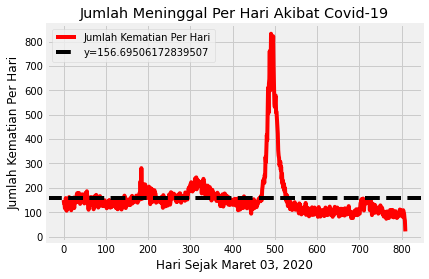

In [ ]:
plot_rates(adjusted_dates, df_pemakaman['Harian Pemakaman Umum'], 'Jumlah Meninggal Per Hari Akibat Covid-19', 'Jumlah Kematian Per Hari','red')

Dari visual diatas didapatkan hasil analisis, bahwa jumlah kematian per hari di Jakarta, mendapatkan kenaikan tertinggi pada hari ke-500 **(16 Juli 2021)** yang disebabkan oleh aktifitas setelah Hari Raya Idul Fitri, dan mengalami penurunan dibawah rata - rata pada hari ke-600 sampai sekarang.

<br>Penurunan jumlah kasus meninggal perhari akibat Covid-19 disebabkan oleh pemerataan vaksin yang digencarkan oleh program pemerintah daerah, dimana masyarakat wajib untuk vaksin Covid-19 sebanyak 3 kali. Sebagai syarat untuk administrasi dan berpergian<br>

## Visualisasi Mortality dan Recovery Rate

In [ ]:
df_covid.iloc[200,:]

Tanggal                    2020-09-19
Positif (Jakarta)               61807
Sembuh (Jakarta)                47260
Meninggal (Jakarta)              1546
Positif Aktif (Jakarta)         13001
mortality_rate               0.025013
recovery_rate                0.764638
Name: 200, dtype: object

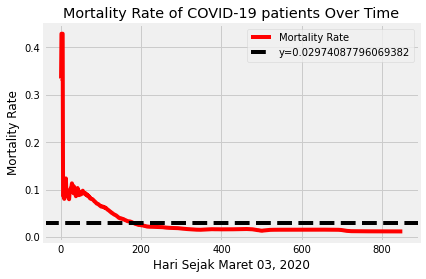

In [ ]:
plot_rates(adjust_dates, df_covid["mortality_rate"], 'Mortality Rate of COVID-19 patients Over Time', 'Mortality Rate','red')

Tingkat kematian menurun seiring berjalannya waktu, yang menunjukkan penanganan Covid-19 di Jakarta dan fasilitas kesehatan menunjukkan peningkatan, dan terlihat bahwa sejak hari ke-200 **(19 September 2020)** tingkat kematian turun dibawah rata - rata.

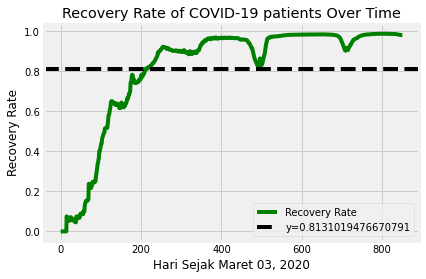

In [ ]:
plot_rates(adjust_dates, df_covid["recovery_rate"], 'Recovery Rate of COVID-19 patients Over Time', 'Recovery Rate','green')

Tingkat Kesembuhan meningkat pada hari ke-200 **(19 September 2020)** yang mana pemerintah DKI Jakarta sangat berkomitmen dalam meningkatkan fasilitas dan pelayanan kesehatan.

<br>Tetapi pada hari ke 500 dan 715, tepatnya tanggal **16 Juli 2021 dan 16 Februari 2022** terjadi penurunan tingkat kesembuhan akibat dari aktivitas Hari Raya Idul Fitri dan varian baru *Omnicron*.<br>

<br>Penurunan tingkat kesehatan pada hari ke-715 **(16 Febuari 2022)** lebih kecil jika dibandingkan hari ke-500, hal ini disebabkan oleh program pemrataan vaksin yang dilakukan oleh pemerintah sejak tanggal **13 Januari 2021**.<br>

[Informasi vaksin hari pertama oleh kompas.com](https://nasional.kompas.com/read/2021/01/14/06572221/dimulainya-vaksinasi-covid-19-di-indonesia)

[Sumber informasi varian *Omnicron* oleh tirto.id](https://tirto.id/update-covid-omicron-dunia-16-februari-ada-715-juta-kasus-aktif-go1F)

[Sumber informasi hari pertama vaksin oleh kompas.com ](https://nasional.kompas.com/read/2021/01/14/06572221/dimulainya-vaksinasi-covid-19-di-indonesia)

# **Modelling**

### Mendefinisikan variabel yang akan digunakan untuk modeling

In [114]:
sembuh = df_covid["Sembuh (Jakarta)"]
total_recovered = np.array(sembuh).reshape(-1, 1)

days = np.array([i for i in range(len(df_covid.Tanggal))]).reshape(-1, 1)

jml_hari_future = 15
forecast_future = np.array([i for i in range(len(df_covid.Tanggal)+jml_hari_future)]).reshape(-1, 1)

In [116]:
start = '2020-03-03'
start_date = datetime.datetime.strptime(start, '%Y-%m-%d')
dates_for_forecast_future = []
for i in range(len(forecast_future)):
    dates_for_forecast_future.append((start_date + datetime.timedelta(days=i)).strftime('%Y-%m-%d'))

### Membagi Train Test Data

In [ ]:
X_confirmed_train, X_confirmed_test, y_confirmed_train, y_confirmed_test = train_test_split(days, total_recovered, test_size=0.30, shuffle=False) 

### Membuat Model Algoritma Linear Regression

In [ ]:
# define linear regression model
linear_model = LinearRegression(normalize=True, fit_intercept=False)

In [117]:
# function to train the model and predict the number of probable cases
def execute_linear_model(X_confirmed_train, y_confirmed_train, X_confirmed_test, forecast_future):

    linear_model.fit(X_confirmed_train, y_confirmed_train)
    test_linear_pred = linear_model.predict(X_confirmed_test)
    linear_pred = linear_model.predict(forecast_future)
    print('MAE:', mean_absolute_error(test_linear_pred, y_confirmed_test))
    print('MSE:',mean_squared_error(test_linear_pred, y_confirmed_test))
    return test_linear_pred, linear_pred

In [118]:
# function to plot the models predictions against the test data
def plot_model_predictions(model,y_confirmed_test,test_linear_pred):
    plt.plot(y_confirmed_test)
    plt.plot(test_linear_pred)
    plt.legend(['Test Data',  model+' Regression Predictions'])

In [119]:
test_linear_pred, linear_pred = execute_linear_model(X_confirmed_train, y_confirmed_train,X_confirmed_test,forecast_future)

MAE: 276565.64341631636
MSE: 88475440586.90549


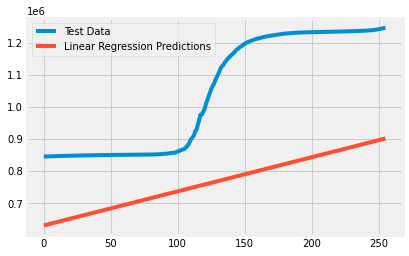

In [120]:
plot_model_predictions('Linear',y_confirmed_test,test_linear_pred)

berdasarkan hasil model prediksi diatas, dapat dilihat bahwa hasil prediksi menggunakan linear regreesion tidak terlalu baik, karena hasil prediksinya lebih rendah dibandingkan hasil testing nya. untuk mencari model terbaik, maka model linear regression diubah menjadi polynomial linear regression menggunakan dengan derejat 2 dan 3

In [121]:
# transform our data for polynomial variants of linear regression
def transform_to_poly(degree=2):

    poly = PolynomialFeatures(degree)
    poly_X_confirmed_train = poly.fit_transform(X_confirmed_train)
    poly_X_confirmed_test = poly.fit_transform(X_confirmed_test)
    poly_forecast_future = poly.fit_transform(forecast_future)
    
    return poly_X_confirmed_train, poly_X_confirmed_test, poly_forecast_future

In [122]:
poly_2_X_confirmed_train, poly_2_X_confirmed_test, poly_2_forecast_future = transform_to_poly(degree = 2)

In [123]:
test_ploy_2_pred, poly_2_pred = execute_linear_model(poly_2_X_confirmed_train,y_confirmed_train,poly_2_X_confirmed_test,poly_2_forecast_future)

MAE: 428682.0112344
MSE: 217561432079.20538


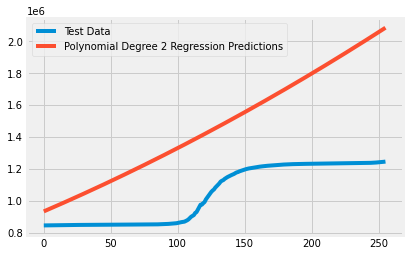

In [124]:
plot_model_predictions('Polynomial Degree 2',y_confirmed_test,test_ploy_2_pred)

In [125]:
poly_3_X_confirmed_train, poly_3_X_confirmed_test, poly_3_forecast_future = transform_to_poly(degree = 3)
test_ploy_3_pred, poly_3_pred = execute_linear_model(poly_3_X_confirmed_train,y_confirmed_train,poly_3_X_confirmed_test,poly_3_forecast_future)

MAE: 496675.80549360276
MSE: 296378926825.0169


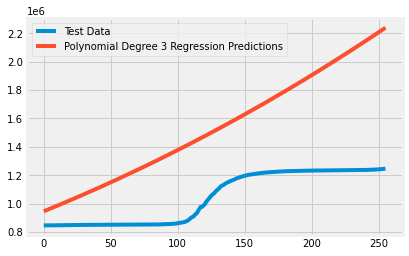

In [126]:
plot_model_predictions('Polynomial Degree 3',y_confirmed_test,test_ploy_3_pred)

In [127]:
test_avg_pred = []
for i in range(0,len(test_ploy_2_pred)):
    temp = float(test_ploy_2_pred[i]+test_ploy_3_pred[i])/2
    test_avg_pred.append(temp)

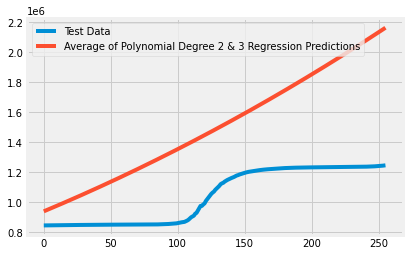

In [128]:
plot_model_predictions('Average of Polynomial Degree 2 & 3',y_confirmed_test,test_avg_pred)

berdasarkan hasil evaluasi model menggunakan polynomial LR, hasil polynomial menggunakan derajat 2 lebih baik dibandingkan menggunakan derajat 3. untuk mencari perbandingan lain, maka polynomial derajat 2 dan 3 di rata-rata untuk mengetahui hasil prediksi rata-rata menggunakan polynomial

In [129]:
print('MAE:', mean_absolute_error(test_avg_pred, y_confirmed_test))
print('MSE:',mean_squared_error(test_avg_pred, y_confirmed_test))

MAE: 462678.9083640014
MSE: 255384247892.7372


In [130]:
preds = []
for i in range(0,len(poly_2_pred)):
    temp = float(poly_2_pred[i]+poly_3_pred[i])/2
    preds.append(temp)

In [132]:
def plot_future_predictions(x_data, y_data, predictions, algorithms):
  
    plt.figure(figsize=(12, 9))
    plt.plot(x_data, y_data)
    for prediction in predictions:
        plt.plot(forecast_future, prediction, linestyle='dashed')
    plt.title('Tingkat Kesembuhan Covid-19 di Provinsi Jakarta')
    plt.xlabel('Hari sejak 3 Maret, 2020')
    plt.ylabel('Number of Cases')
    legend = ['Total Sembuh']
    for algorithm in algorithms:
        legend.append(algorithm)
    plt.legend(legend)
    plt.ticklabel_format(style = 'plain')
    plt.show()

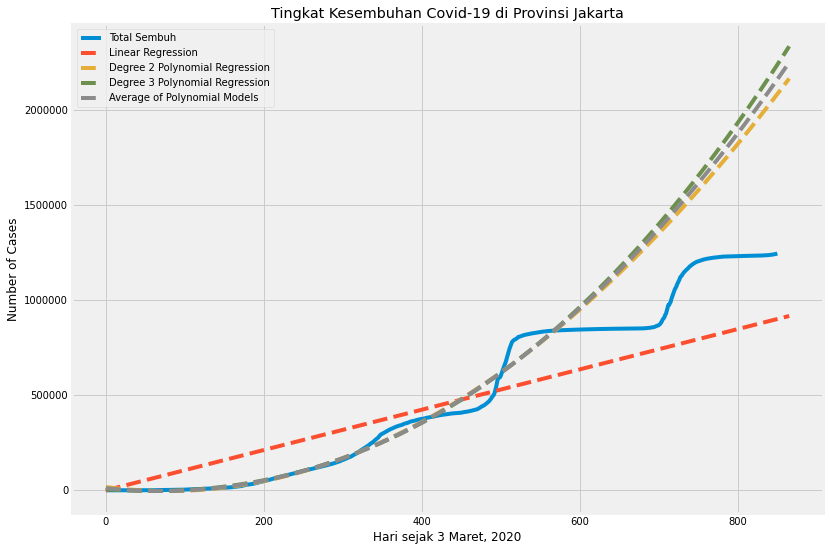

In [133]:
adjusted_dates = forecast_future[:-15]
pred = [linear_pred, poly_2_pred, poly_3_pred, preds]
algos = ['Linear Regression','Degree 2 Polynomial Regression','Degree 3 Polynomial Regression','Average of Polynomial Models']
plot_future_predictions(adjusted_dates, total_recovered,pred,algos)

berdasarkan perbandingan evaluasi, dapat disimpulkan bahwa, untuk model menggunakan linear regression tidak menghasilkan prediksi yang baik, karena hasil prediksi masih dibawah hasil testing. Sedangkan untuk hasil prediksi menggunakan polynomial, dapat dilihat hasil prediksi yang paling mendekati adalah menggunakan **Polynomial 2 Derajat**

#### Hasil Prediksi Tingkat Kesembuhan 15 Hari Kedepan Menggunakan Polynomial Derajat 2

In [137]:
poly_2_preds = poly_2_pred.reshape(1,-1)[0]
poly_2_df = pd.DataFrame({'Tanggal': dates_for_forecast_future[-15:], 'Prediksi TIngkat Kesembuhan': np.round(poly_2_preds[-15:])})
poly_2_df

,Tanggal,Prediksi TIngkat Kesembuhan
0,2022-07-02,2090957.0
1,2022-07-03,2096379.0
2,2022-07-04,2101808.0
3,2022-07-05,2107244.0
4,2022-07-06,2112687.0
5,2022-07-07,2118137.0
6,2022-07-08,2123594.0
7,2022-07-09,2129058.0
8,2022-07-10,2134529.0
9,2022-07-11,2140007.0


#### Hasil Prediksi Tingkat Kesembuhan 15 Hari Kedepan Menggunakan Polynomial Derajat 3

In [134]:
poly_3_preds = poly_3_pred.reshape(1,-1)[0]
poly_3_df = pd.DataFrame({'Tanggal': dates_for_forecast_future[-15:], 'Prediksi TIngkat Kesembuhan': np.round(poly_3_preds[-15:])})
poly_3_df

,Tanggal,Prediksi TIngkat Kesembuhan
0,2022-07-02,2246638.0
1,2022-07-03,2253022.0
2,2022-07-04,2259417.0
3,2022-07-05,2265823.0
4,2022-07-06,2272240.0
5,2022-07-07,2278667.0
6,2022-07-08,2285105.0
7,2022-07-09,2291554.0
8,2022-07-10,2298013.0
9,2022-07-11,2304483.0


#### Hasil Prediksi Tingkat Kesembuhan 15 Hari Kedepan Menggunakan Rata - Rata Polynomial

In [135]:
preds_m = np.array(preds).reshape(1,-1)[0]
poly_df = pd.DataFrame({'Tanggal': dates_for_forecast_future[-15:], 'Prediksi Tingkat Kesembuhan': np.round(preds[-15:])})
poly_df

,Tanggal,Prediksi Tingkat Kesembuhan
0,2022-07-02,2168798.0
1,2022-07-03,2174701.0
2,2022-07-04,2180613.0
3,2022-07-05,2186534.0
4,2022-07-06,2192463.0
5,2022-07-07,2198402.0
6,2022-07-08,2204350.0
7,2022-07-09,2210306.0
8,2022-07-10,2216271.0
9,2022-07-11,2222245.0


### Visualisasi Prediksi Tingkat Kesembuhan 15 Hari Kedepan dengan Polynomial Derajad 2

In [142]:
def plot_predict(x_data, y_data, title, y_label):
    plt.plot(x_data, y_data)
    plt.title(title)
    plt.xlabel('Hari Sejak Juli 02, 2022')
    plt.ylabel(y_label)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

In [138]:
prediksi_kesembuhan = np.array([i for i in range(len(poly_2_df.Tanggal))]).reshape(-1, 1)
tanggal_prediksi = prediksi_kesembuhan[:]

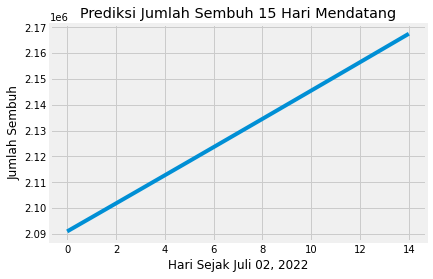

In [143]:
plot_predict(tanggal_prediksi, poly_2_df["Prediksi TIngkat Kesembuhan"], 'Prediksi Jumlah Sembuh 15 Hari Mendatang', 'Jumlah Sembuh')

# **Conclusion**

Dari analisis diatas didapatkan kesimpulan, bahwa program pemerintah daerah dalam menggencarkan vaksin [sebagai syarat administrasi publik dan berpergian](https://www.beritasatu.com/archive/807969/anies-tegaskan-vaksinasi-jadi-persyaratan-administrasi-berkegiatan-di-jakarta), terbukti mampu menurunkan nilai kematian per hari sebesar **86%** (terhitung dari hari terakhir penggambilan data). Karena vaksin meningkatkan respons kekebalan pada orang dewasa yang lebih muda dan lebih tua. Oleh sebab itu perlu dilakukan sosialisasi kepada masyarakat mengenai efektivitas dan keamanan vaksin COVID‑19 juga merupakan hal penting, yang bertujuan meningkatkan tingkat penerimaan vaksin pada masyarakat.


![Grafik Kematian Tiap Hari](https://raw.githubusercontent.com/adeirvan123/Tugas-Soal-1/a35b606594e17f94353c4eba152d49a4caaa2e45/kematian_perHari.png)

<br>Selain itu, kesadaran masyarakat perlu ditingkatkan juga dalam disiplin menjalankan protokol kesehatan, dimana hal ini sangat berpengaruh terhadap kelonjakan kasus pada hari ke 500 dan 715 **(16 Juli 2021 dan 16 Februari 2022)** yang bertepatan dengan Hari Raya Idul Fitri dan penyebaran varian baru *Omnicron*.

![Kenaikan kasus positif](https://raw.githubusercontent.com/adeirvan123/Tugas-Soal-1/main/positif-aktif.png)<br>

<br>Hal ini, juga berdampak pada tingkat kesembuhan, dimana kedisiplan masyarakat dalam menerapkan protokol kesehatan sangat berpengaruh, seperti gambar berikut, dimana terjadi penurunan tingkat recovery rate **(garis hijau)**. Pada hari yang sama dengan naiknya kasus positif diatas.

![Grafik Recovery Rate](https://raw.githubusercontent.com/adeirvan123/Tugas-Soal-1/main/recovery%20rate.png)<br>

<br>Berdasarkan hasil prediksi yang kami lakukan terkait jumlah sembuh untuk 15 hari hari mendatang pada **02 Juli 2022** sampai **16 Juli 2022**, didapatkan hasil kenaikan jumlah orang yang sembuh dari Covid-19. Terlihat seperti grafik dibawah ini. 

![Grafik Prediksi Jumlah Sembuh](https://raw.githubusercontent.com/adeirvan123/Tugas-Soal-1/main/predict_sembuh.png)<br>

# **Daftar Pustaka**

[1]	“Efektivitas Dan Keamanan Vaksin Covid-19 : Studi Refrensi | Nugroho | Jurnal Keperawatan Profesional.” https://www.ejournal.unuja.ac.id/index.php/jkp/article/view/2767/1002 (accessed Jul. 04, 2022).

[2]	“Dimulainya Vaksinasi Covid-19 di Indonesia.” https://nasional.kompas.com/read/2021/01/14/06572221/dimulainya-vaksinasi-covid-19-di-indonesia (accessed Jul. 04, 2022).

[3]	“BPS Provinsi DKI Jakarta.” https://jakarta.bps.go.id/pressrelease/2021/01/22/541/jumlah-penduduk-hasil-sp2020-provinsi-dki-jakarta-sebesar-10-56-juta-jiwa.html (accessed Jul. 04, 2022).

[4]	“Update Covid & Omicron Dunia 16 Februari: Ada 71,5 Juta Kasus Aktif.” https://tirto.id/update-covid-omicron-dunia-16-februari-ada-715-juta-kasus-aktif-go1F (accessed Jul. 04, 2022).

[5]	“Per 16 Juli 2021, 113.137 Warga Jakarta Masih Terpapar Covid-19 | merdeka.com.” https://www.merdeka.com/jakarta/per-16-juli-2021-113137-warga-jakarta-masih-terpapar-covid-19.html (accessed Jul. 04, 2022).

[6]	“covid19_analysis/COVID19_Analysis-Updated.ipynb at master · chaitanyakasaraneni/covid19_analysis · GitHub.” https://github.com/chaitanyakasaraneni/covid19_analysis/blob/master/COVID19_Analysis-Updated.ipynb (accessed Jul. 04, 2022).

[7]	“Analisis Penyebab Lonjakan Dahsyat Covid-19 di Indonesia | merdeka.com.” https://www.merdeka.com/peristiwa/analisis-penyebab-lonjakan-dahsyat-covid-19-di-indonesia.html (accessed Jul. 04, 2022).
 

